<a href="https://colab.research.google.com/github/khalilkhan1111/corona_virus_tweet_setiment_analysis/blob/main/Corona_virus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**          - Khalil Ullah Khan


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/khalilkhan1111/corona_virus_tweet_setiment_analysis/blob/main/Corona_virus_Tweet_Sentiment_Analysis.ipynb

# **Problem Statement**


**This challenge ask you to build a classification model to predict the sentiment of Covid-19 Tweets. The tweets have been pulled from twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/imp/project/Coronavirus Tweets.csv', encoding='latin1')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

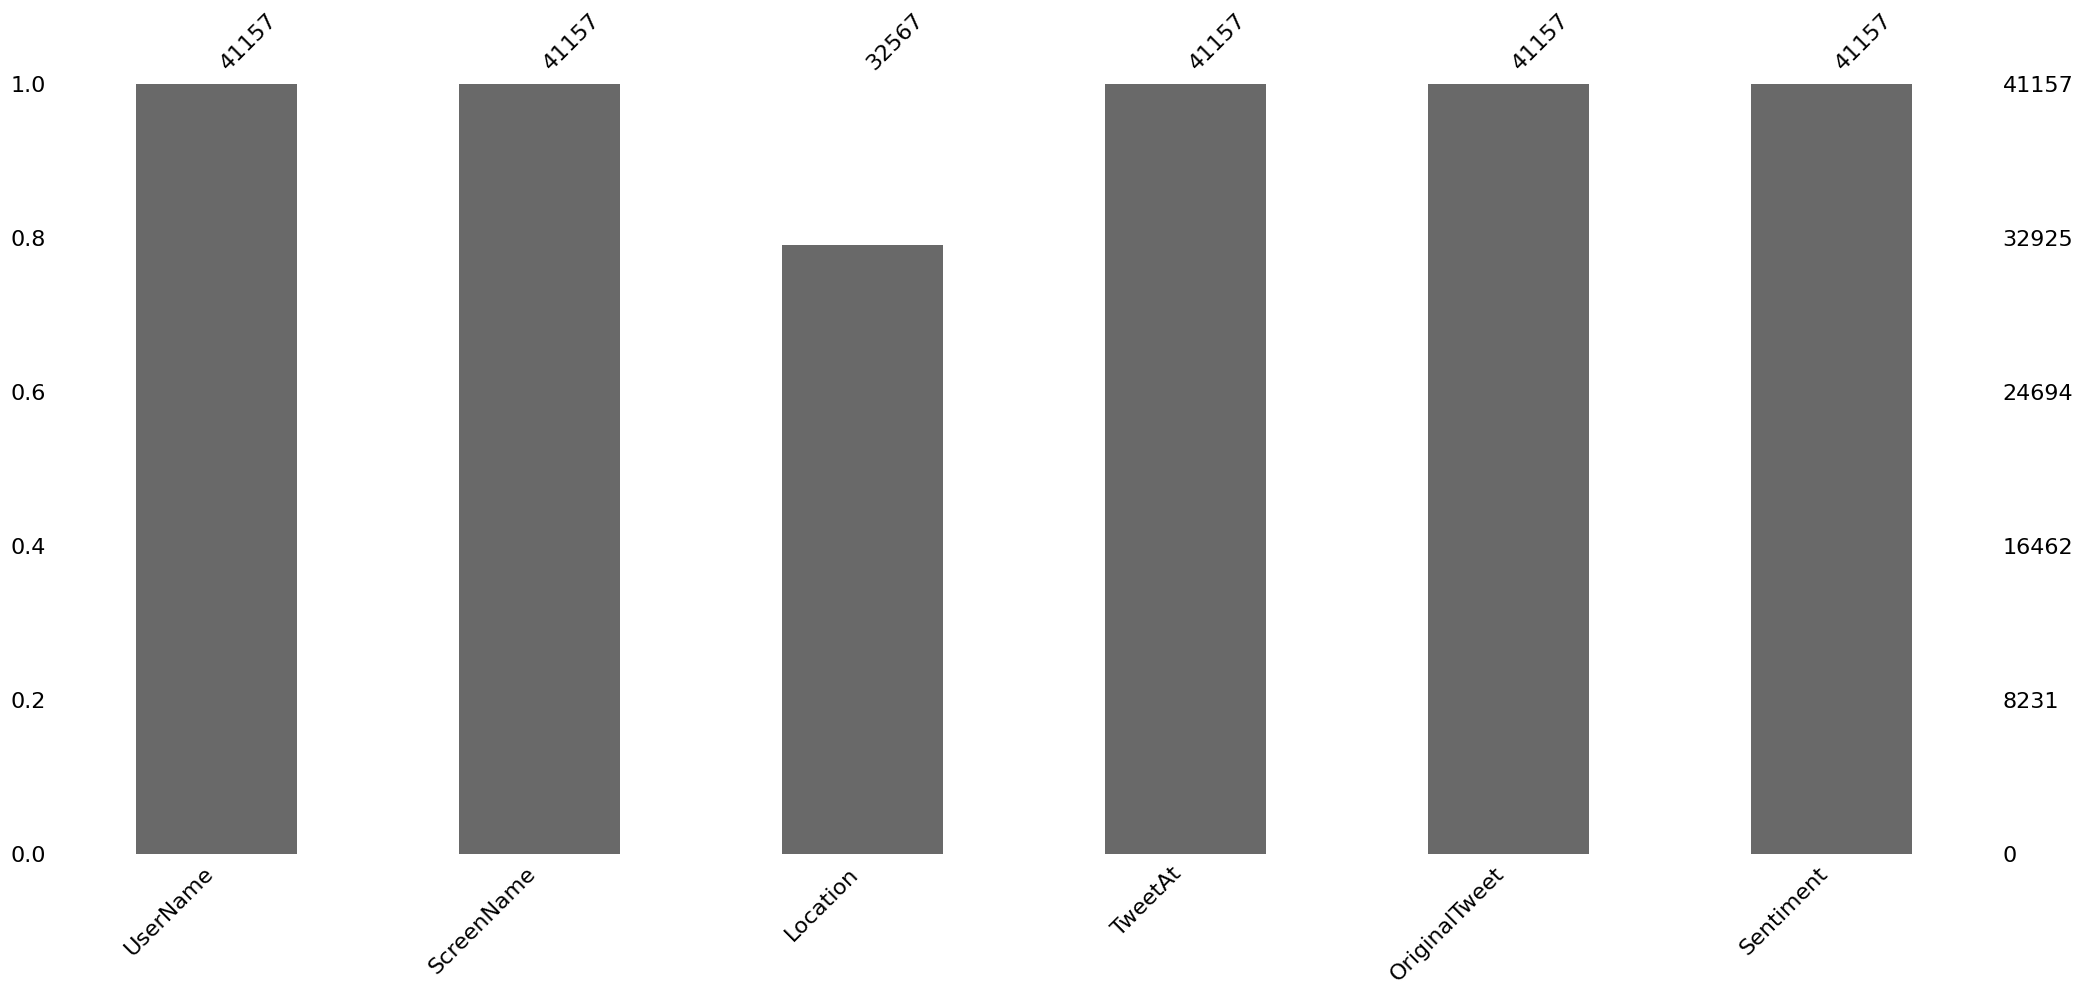

In [10]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

in location column there are 8590 values are missing in the dataset rest of the column does not have any missing values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

Columns names are :-

#**Username -**    Coded Username

#**ScreenName-**   Coded ScreenName

#**Location-**     Region of origin

#**TweetAt-**      Tweet Timing

#**OriginalTweet-** First tweet in the thread

#**Sentiment-**    Sentiment of the tweet

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}" )

Unique values for UserName: [ 3799  3800  3801 ... 44953 44954 44955]
Unique values for ScreenName: [48751 48752 48753 ... 89905 89906 89907]
Unique values for Location: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
Unique values for TweetAt: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
Unique values for OriginalTweet: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shoppin

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Drooping Null values from the dataset
df.dropna(inplace=True)

In [ ]:
# Dataset shape after dropping null rows
df.shape

(32567, 6)

In [ ]:
#checking unique Location column
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
#checking unique sentiment column
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

### What all manipulations have you done and insights you found?

1. Drop the null values and now value is 32567

2. Check the Locations lenght which is 12220

3. Check the sentiment column and found there are 5 unique values in this column


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Tweet count for each sentiment
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

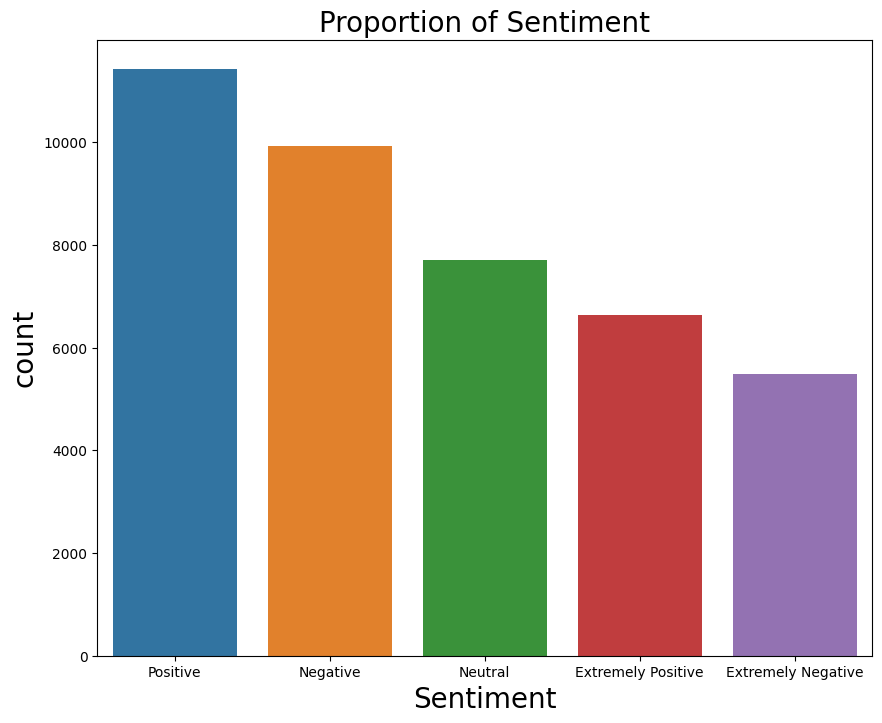

In [ ]:
#visualize the tweet count of sentiment
plt.figure(figsize=(10,8))
tc = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
tc.set_title("Proportion of Sentiment", fontsize=20)
tc.set_xlabel("Sentiment", fontsize=20)
tc.set_ylabel('count', fontsize=20)

##### 1. Why did you pick the specific chart?

To visualize the tweet count of sentiment

##### 2. What is/are the insight(s) found from the chart?

There are 5 different sentiment but majority of sentiment is positive which is more than 10,000, then negative which is 10,000 and then neutral which is more than 7,000 tweets. Least 2 are extreamly positive and extreamly negative

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By understanding the sentiment of the tweets, It can gain valuable insights into users opinions, preferences, and satisfaction levels.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


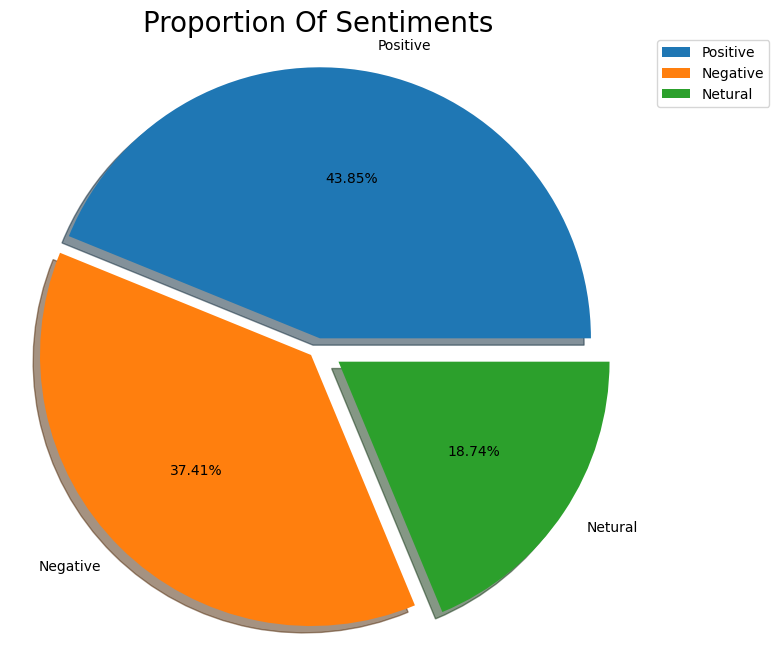

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

We have merge data of extreamly positive in positive and extramly negative in negative and then visualize the data and find out the percentage of different sentiments.

##### 2. What is/are the insight(s) found from the chart?

There are 43.85 percent of positive tweet count, 37.41 percent of negative tweet count and 18.74 percent of neutral tweet count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the sentiments can still help create a positive business impact, despite the slightly lower percentage of positive tweets compared to negative tweets. By understanding the sentiment distribution among the tweets, it can still extract valuable information about users perceptions.

#### Chart - 3

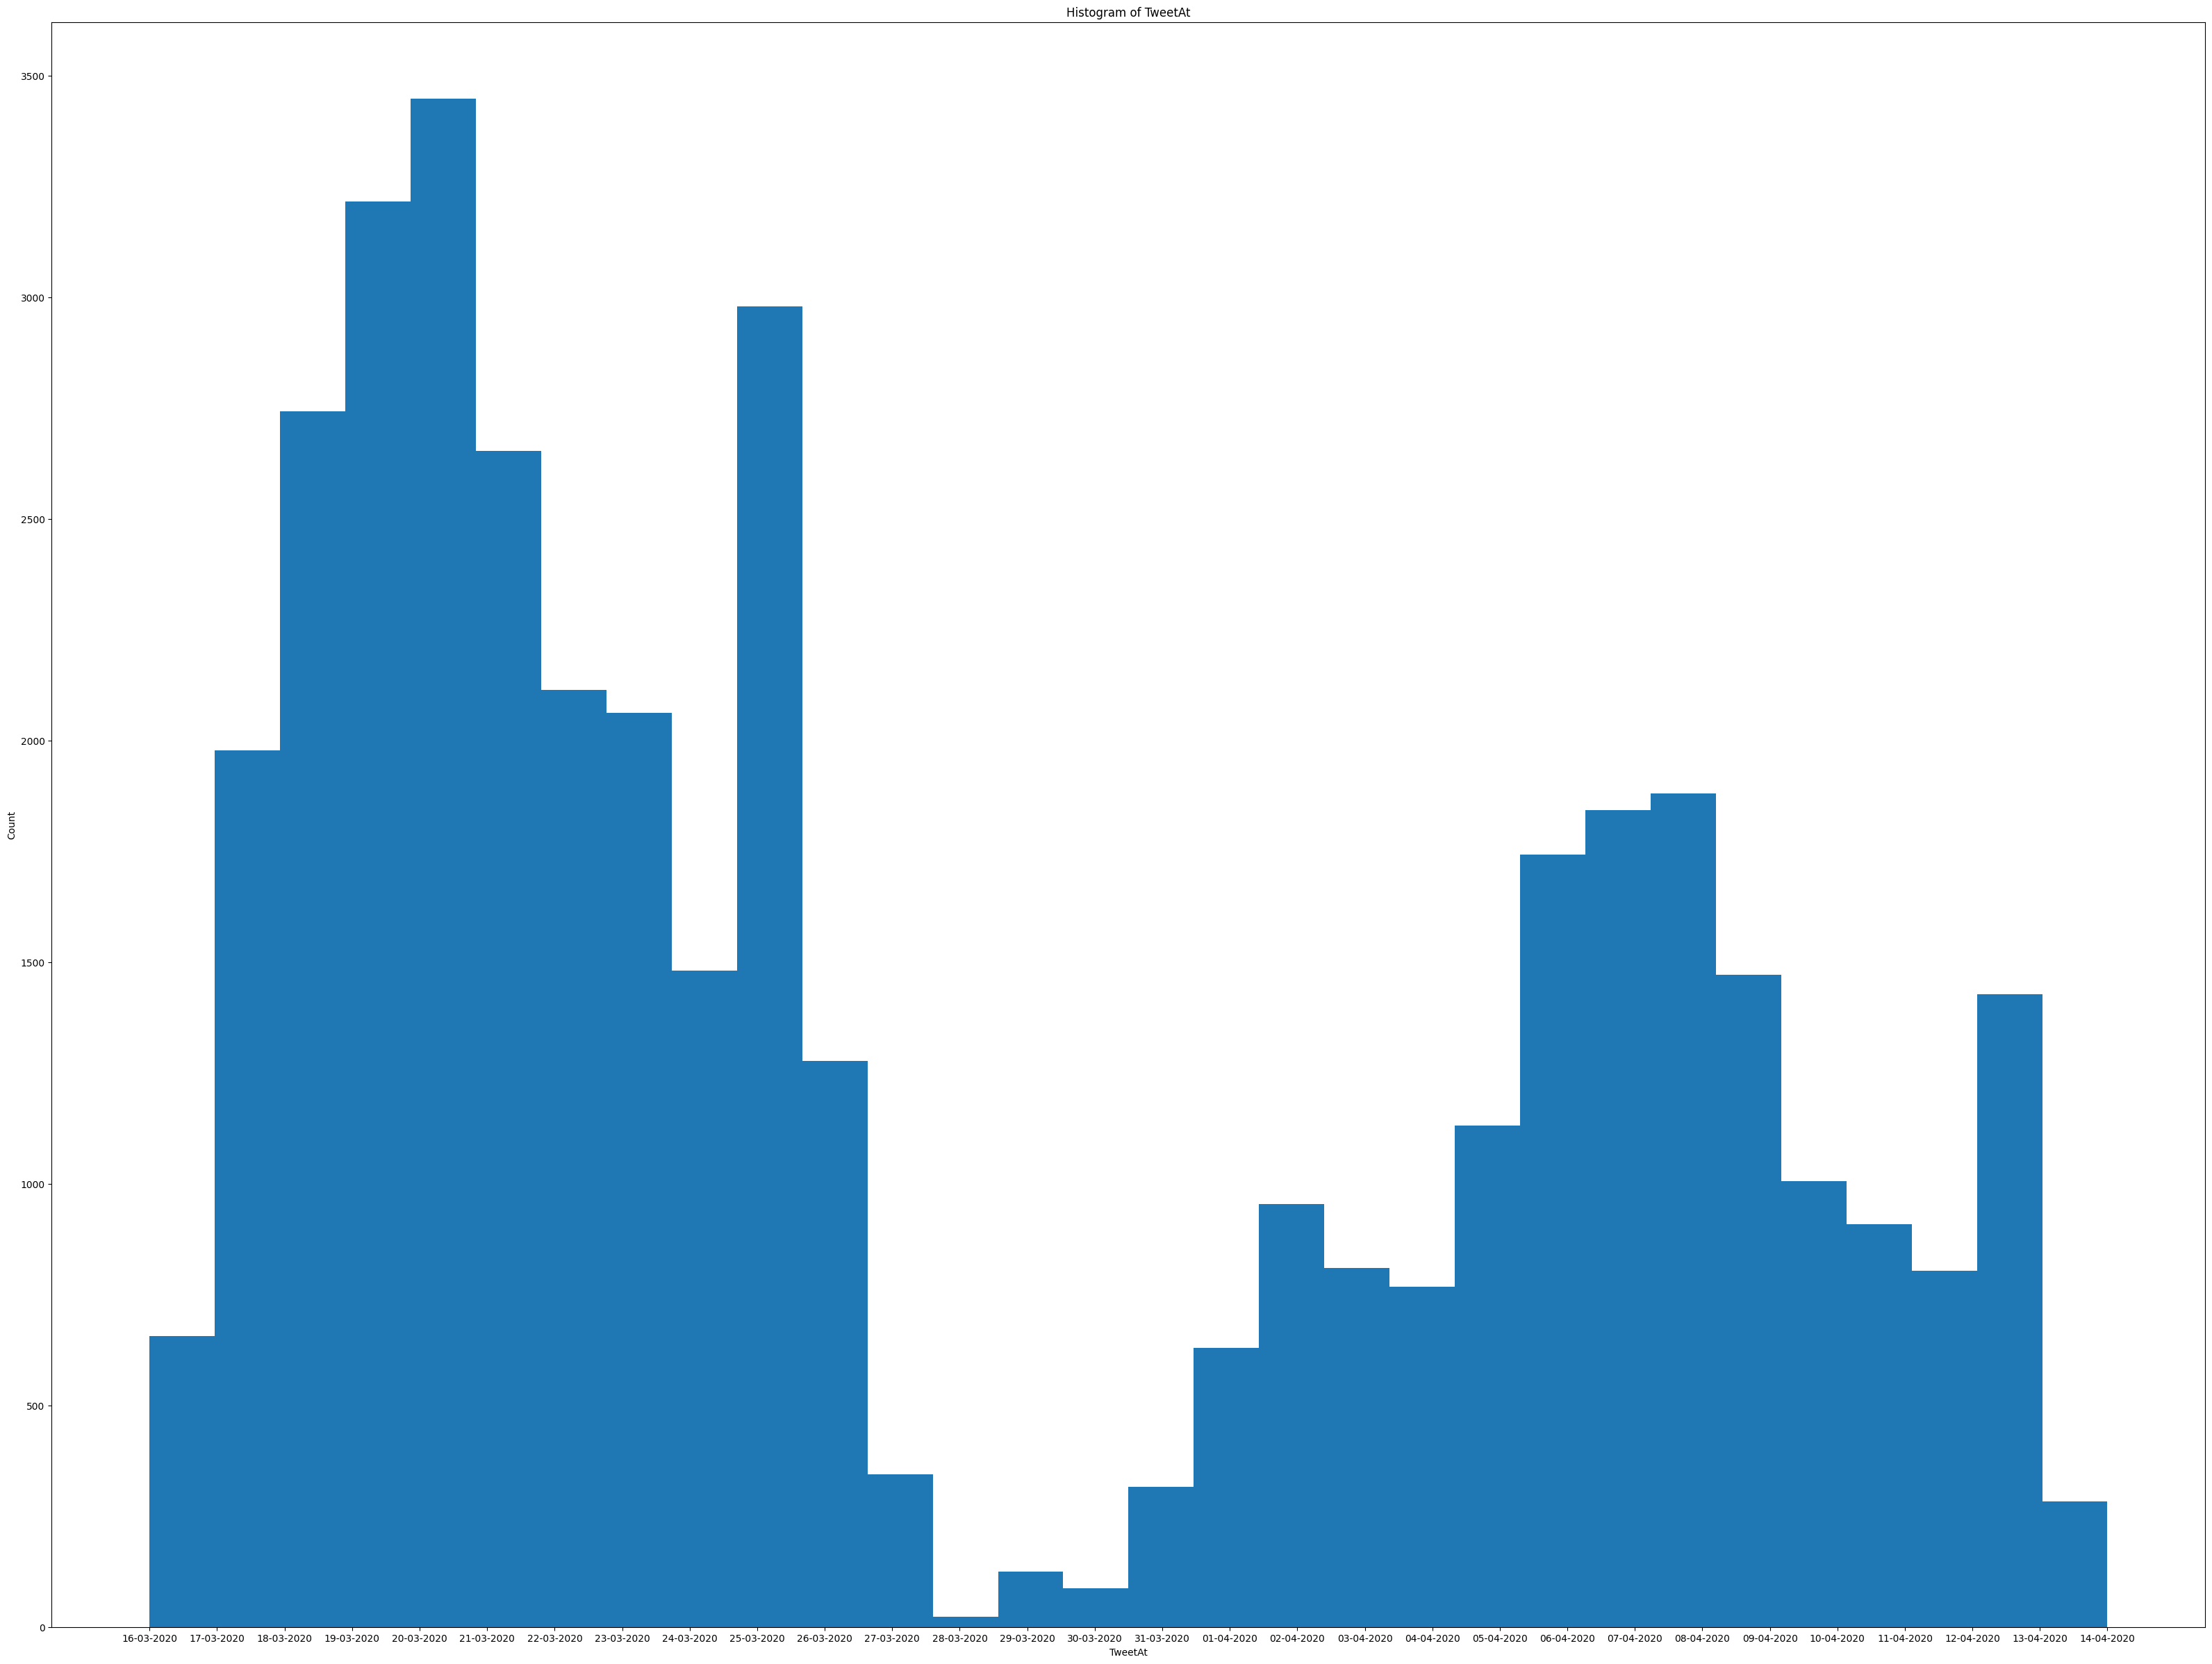

In [ ]:
# Chart - 3 visualization code
#CountPlot for OriginalTweet according to "TweetAt" column
plt.figure(figsize=(40, 30))
plt.hist(df['TweetAt'], bins=30)
plt.xlabel('TweetAt')
plt.ylabel('Count')
plt.title('Histogram of TweetAt')
plt.show()

##### 1. Why did you pick the specific chart?

To check the highest number of tweet in a particular date

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweet done at 20 march 2020 which is approx 3500. Least tweet done at 28 march 2020 which is approx 50 tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative Business Impact:
The insights gained from the low number of tweets on 28th March 2020 can indicate potential negative impacts on the business:

Lack of Engagement: A significantly low volume of tweets on a specific date suggests a lack of engagement or interest from users

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#find the top 10 location vale count
top_location = df['Location'].value_counts().sort_values(ascending=False)[:10]
top_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<Figure size 1800x800 with 0 Axes>

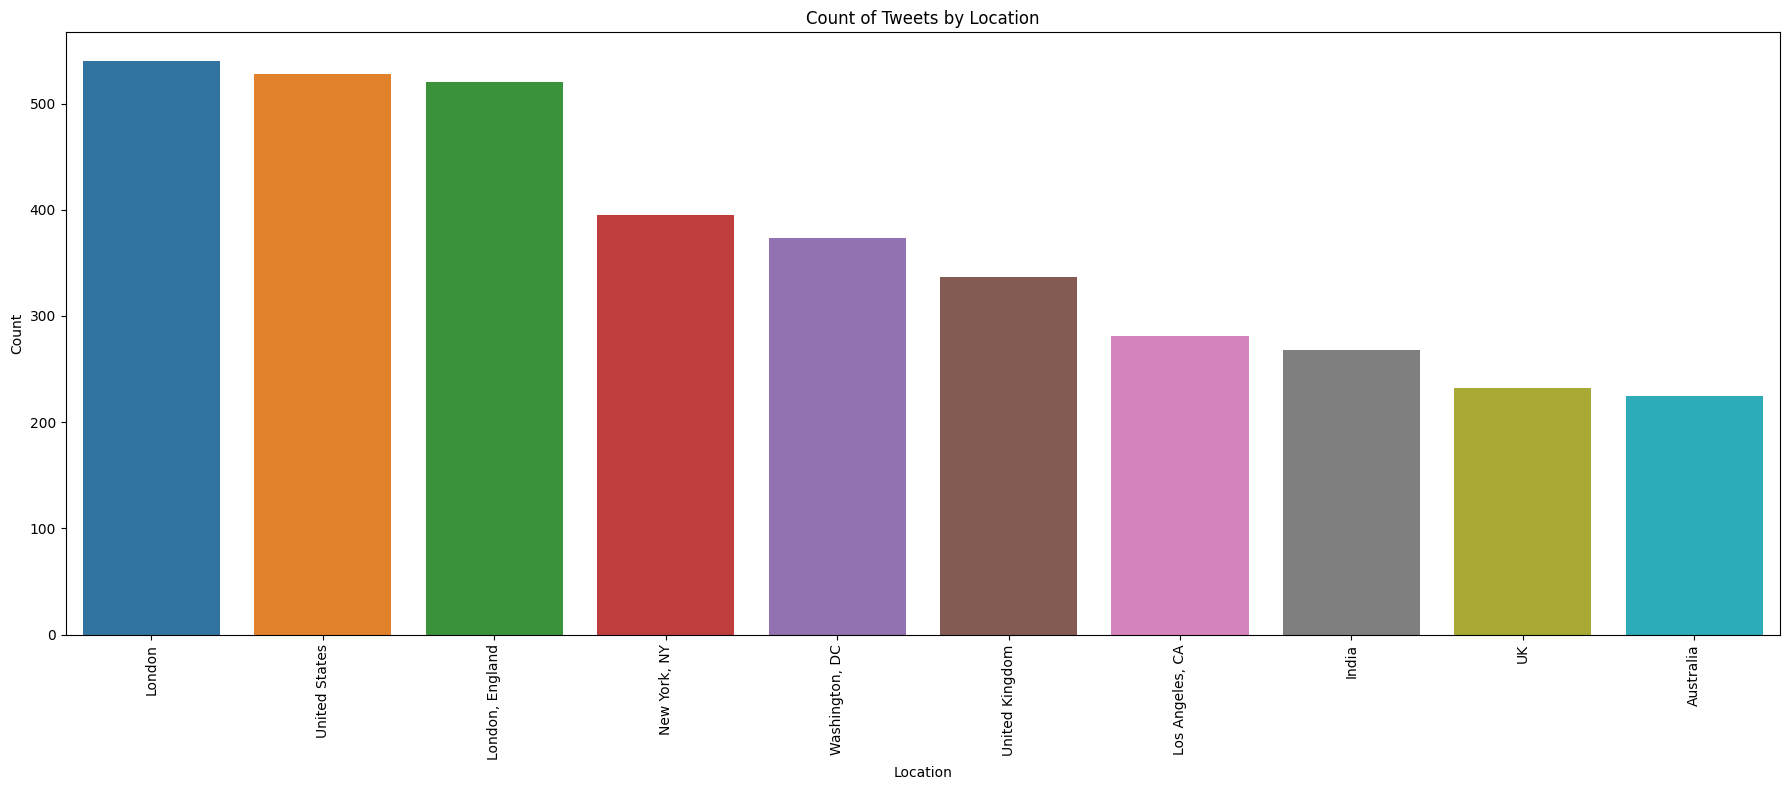

In [ ]:
plt.figure(figsize=(18,8))
plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Location'].isin(top_location.index)], x='Location', order=top_location.index)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Tweets by Location')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 location from where the highest number of tweet is coming from

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweets are coming from London, US and London-England which is approx 500.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

no there is not a negatie impact

#### Chart - 5

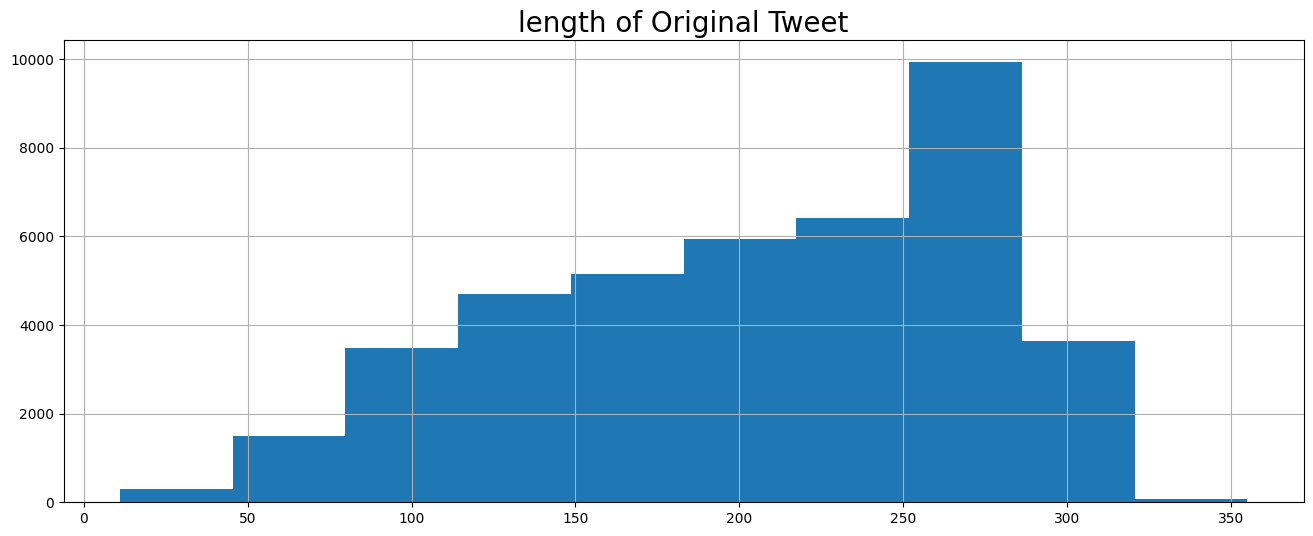

In [ ]:
# Chart - 5 visualization code
#plot of the length of OriginalTweet.
plt.figure(figsize=(16,6))
plt.grid()
plt.title('length of Original Tweet', fontsize = 20)
plt.hist(df['OriginalTweet'].str.len())
plt.show()


##### 1. Why did you pick the specific chart?

To observe the length of original tweets.

##### 2. What is/are the insight(s) found from the chart?

A 10,000 tweets is written about 275 words and this is highest. And average tweet length range is from 200 to 250.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Longer tweets with more words allow users to convey more detailed information about Corona virus.

#### Chart - 6  Correlation Heatmap

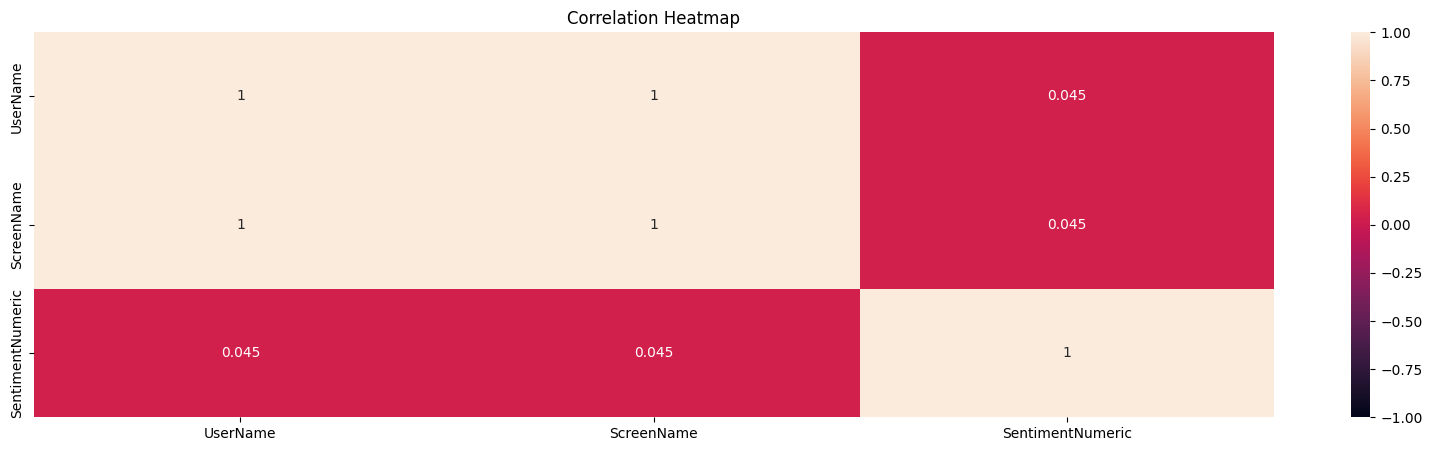

In [ ]:
# Chart - 6 visualization code
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )


##### 1. Why did you pick the specific chart?

To check the co-relation between username, screenname and sentiment numeric.

##### 2. What is/are the insight(s) found from the chart?

Username and screen name are highly co-related but sentiment number is not co-related with screen name and username.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

there is a strong correlation between username and screen name, it indicates that users are aligning their online identities and followers easily identify

#### Chart - 7

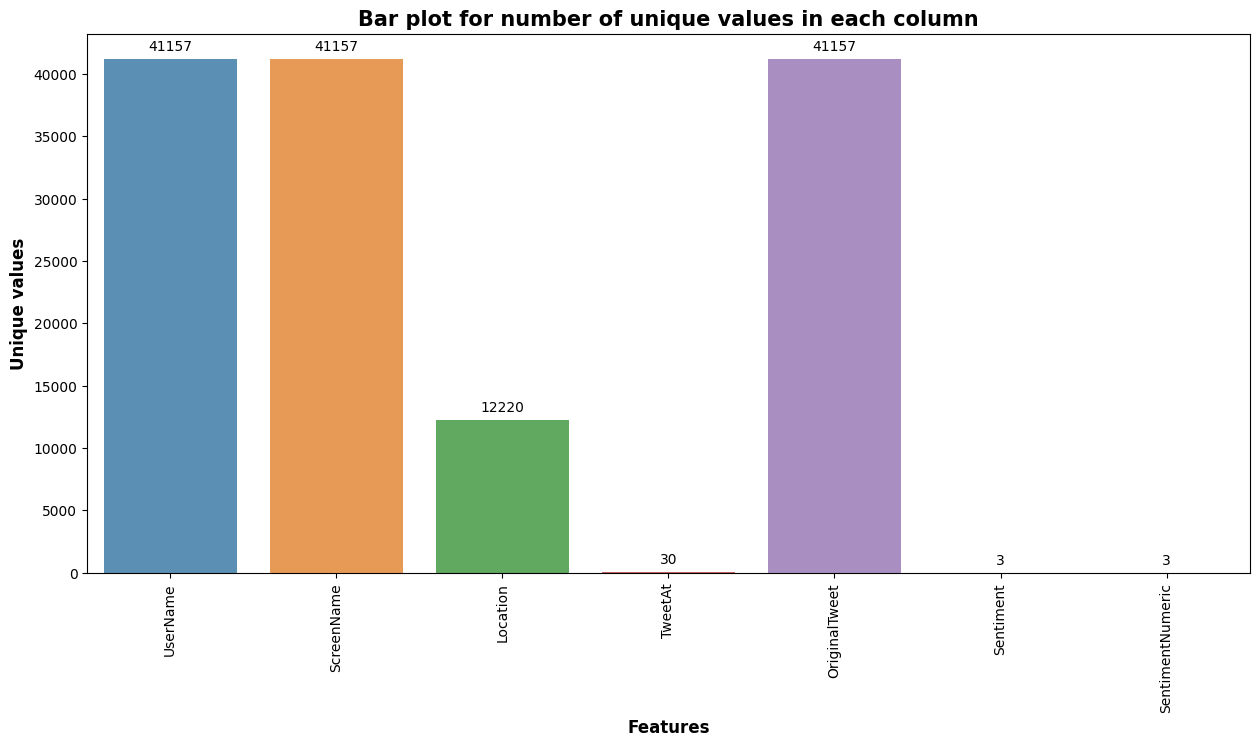

In [ ]:
# Chart - 7 visualization code
#Unique value in each feature columns
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To identify the unique values in each column

##### 2. What is/are the insight(s) found from the chart?

Username, screenname and original tweets have unique values but sentiment and sentiment numeric has least unique values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The unique values of original tweets suggest that users are producing a variety of content, which can be beneficial for attracting and engaging a wider audience.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Importing the required library
from collections import defaultdict

# Copying the dataframe
df1 = df.copy()

# Creating the new column 'Text'
df1['text'] = df1.OriginalTweet
df1["text"] = df1["text"].astype(str)


In [ ]:
def create_corpus(target):
    corpus=[]

    for x in df1[df1['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
# Designing a compilation to emphasize a Positive sentiment.
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

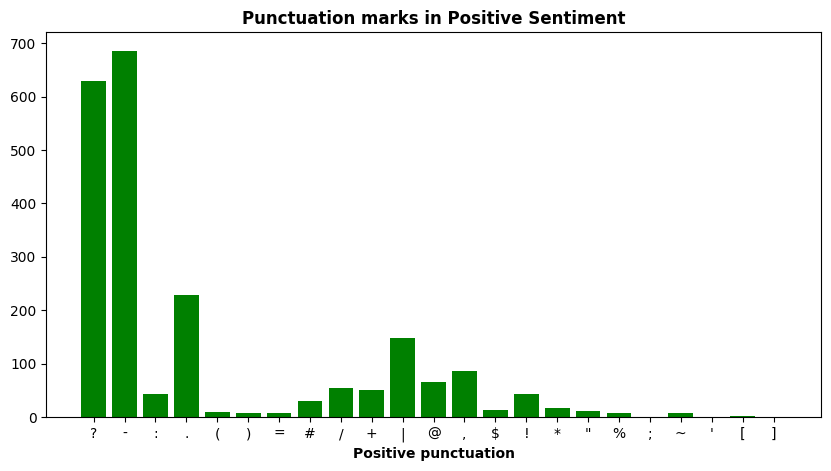

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='green')
plt.xlabel('Positive punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in positive sentiments

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

# Designing a compilation to emphasize a Negative sentiment.
corpus= create_corpus("Negative")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

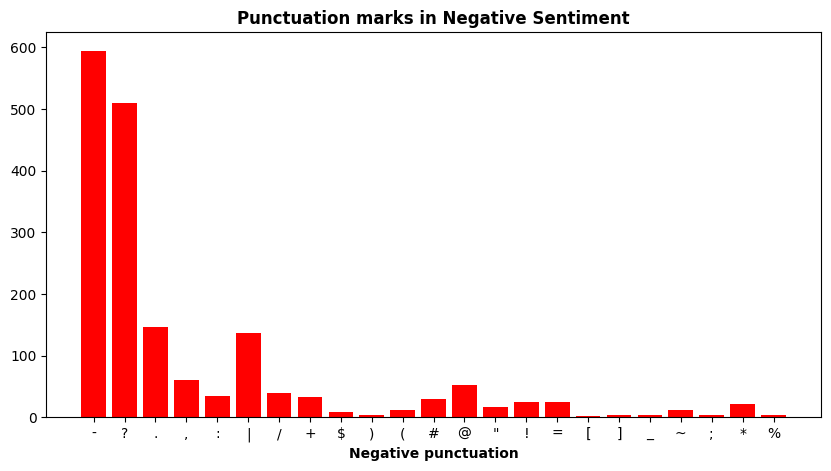

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='Red')
plt.xlabel('Negative punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in negative sentiments


##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

# Designing a compilation to emphasize a neutral sentiment.
corpus= create_corpus("Neutral")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

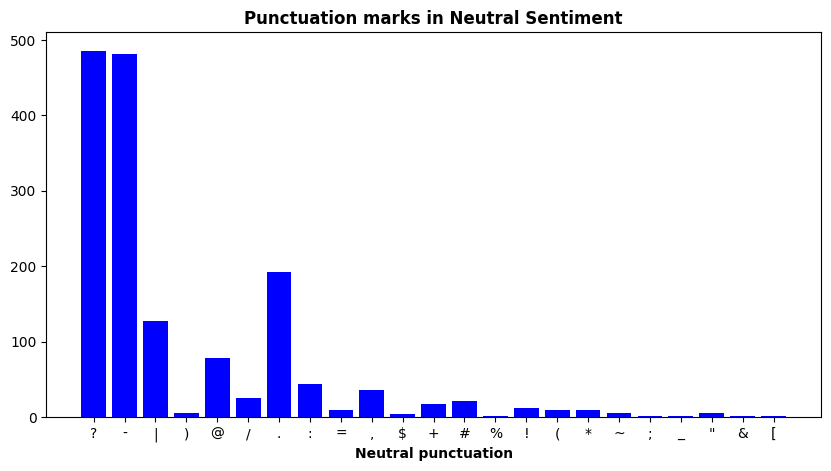

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='blue')
plt.xlabel('Neutral punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in neutral sentiments


##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [23]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [22]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# it is already done

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [29]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
# Perform label encoding
label_encoder = LabelEncoder()
df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

# Print the encoded dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv http

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding is typically used when dealing with categorical variables that have an inherent ordinal relationship or when the machine learning algorithm requires numerical input.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [32]:
# Expand Contraction
#Define contraction mapping dictionary
contractions = {"I'm": 'I am', "You're": 'You are', "I'll": 'I will',"He's": 'He is', "She's": 'She is', "It's": 'It is',"What's":'what is'}

# Function to expand contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Apply expansion of contractions
df['Sentiment_Expanded'] = df['Sentiment'].apply(expand_contractions)

# Print the expanded dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv http

#### 2. Lower Casing

In [46]:
# Lower Casing
# Convert all columns to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Print the modified dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @menyrbie @phil_gahan @chrisitv http

#### 3. Removing Punctuations

In [35]:
# Text Cleaning
df = df.copy()

In [38]:
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,5690,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,positive,10282,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,positive,10551,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,positive,12220,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",extremely negative,12220,Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [40]:
# Remove punctions, words wich are not formed letters
# remove special characters, numbers, punctuations
df['Clean_tweet'] = df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,neutral,5690,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,positive,10282,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,positive,10551,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,positive,12220,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",extremely negative,12220,Extremely Negative,Me ready to go at supermarket during the #COVI...


#### 4. Removing URLs & Removing words and digits contain digits.

In [47]:
# Remove URLs & Remove words and digits contain digits
#Remove @person character
import re
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [48]:
# Removing url, http, etc.
# create new column with removed @user
df['Clean_tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa and https://t.co/xx...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk to your neighbours family to excha...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,"me, ready to go at supermarket during the #cov..."


In [49]:
# Removing short words
# remove short words
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa and https://t.co/xx6gh...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths give elderly...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,food stock not the only one which empty... ple...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,"me, ready supermarket during the #covid19 outb..."


#### 5. Removing Stopwords & Removing White spaces

In [50]:
# Removing stopwords
# Downloading stopwords library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
# Remove Stopwords
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [53]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  # joining the list of words with space separator
  return " ".join(text)

In [54]:
df['Clean_tweet'] = df['Clean_tweet'].apply(remove_stopwords)


# Obtaining top 5 rows after stopwords removal
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa https://t.co/xx6ghgfzc...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk neighbours family exchange phone n...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths give elderly...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,"food stock one empty... please, panic, enough ..."
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,"me, ready supermarket #covid19 outbreak. i'm p..."


In [55]:
# Remove White spaces
# Remove white spaces from the 'Clean_tweet' column
df['Clean_tweet'] = df['Clean_tweet'].str.strip()

# Print the modified DataFrame
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @menyrbie @phil_gahan @chrisitv http

#### 6. Rephrase Text

In [58]:
# Rephrase Text


#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***